In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("Stress-Lysis.csv")
print(df)

      Humidity  Temperature  Step count  Stress Level
0        21.33        90.33         123             1
1        21.41        90.41          93             1
2        27.12        96.12         196             2
3        27.64        96.64         177             2
4        10.87        79.87          87             0
...        ...          ...         ...           ...
1996     21.82        90.82          96             1
1997     10.45        79.45          45             0
1998     27.22        96.22         135             2
1999     12.46        81.46          64             0
2000     16.87        85.87          50             1

[2001 rows x 4 columns]


In [11]:
print(df.isnull().sum())

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64


In [16]:
df=df.dropna()
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


C:\Users\suhaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


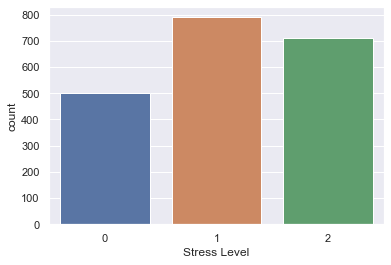

In [22]:

sns.countplot(df["Stress Level"])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x=df.drop(['Stress Level'],axis=1)
y=df['Stress Level']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))

0.9975062344139651


In [37]:
print(accuracy_score(y_test,pred)*100)

99.75062344139651
